<img src="https://cdn.videoplasty.com/gif/stethoscope-flat-icon-gif-stock-gif-3525-640x360.gif?1573985454">

### DATA COLLECTION

In [138]:
import pandas as pd
df=pd.read_csv("insurance.csv")

### DATA EXP 

In [139]:
df.shape

(1338, 7)

In [140]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [141]:
df.isnull().mean()

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [143]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [144]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

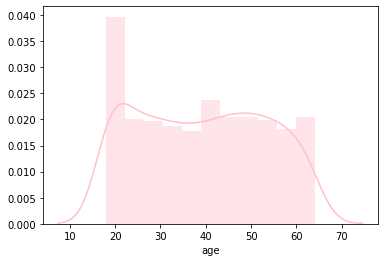

In [145]:
#checking distribution of age
sns.distplot(df["age"],color="pink")

our data set has age across all variations.

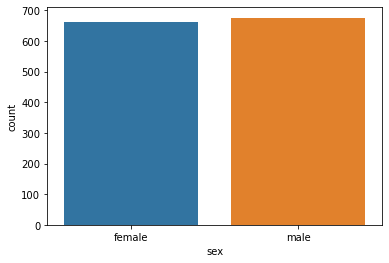

In [146]:
sns.countplot(df["sex"])

female and male are almost equal in number.

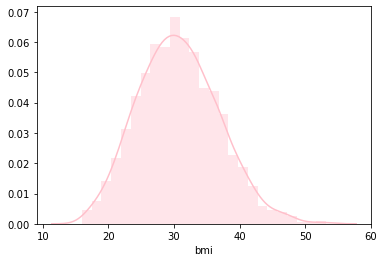

In [147]:
#checking distribution of bmi
sns.distplot(df["bmi"],color="pink")

bmi column is normally distributed.

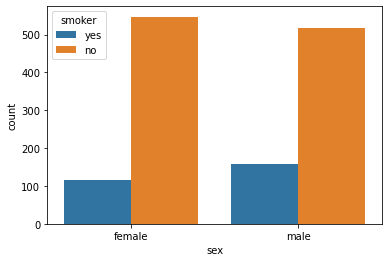

In [148]:
#checking male and female smokers
sns.countplot(df["sex"],hue=df["smoker"])

There are more female smokers than male smokers we can see from our data set.

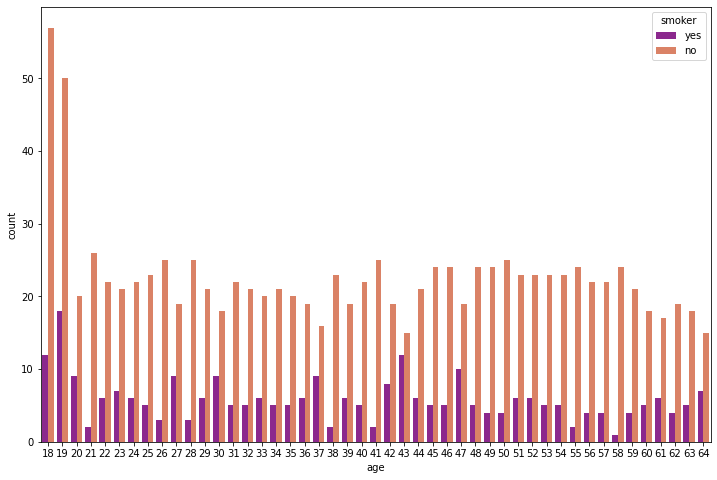

In [149]:
#age vs smoker
plt.figure(figsize=(12,8))
a=df["age"].sort_values()
sns.countplot(a,hue=df["smoker"],palette="plasma")

Our plot has a mixed response,people smoke across all age group.

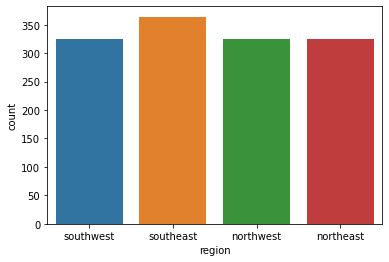

In [150]:
#checking regions through vizualization
sns.countplot(df["region"])

Data set has maximum people from southeast region.

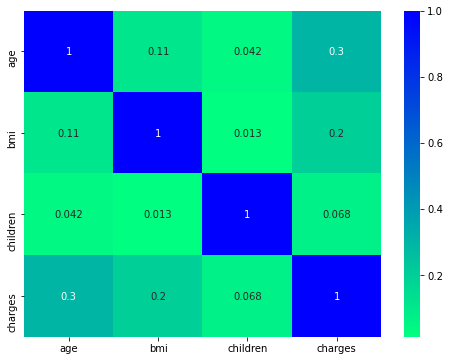

In [151]:
#checking correlation amongst our parametrers
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="winter_r")

### FEATURE ENGG

In [152]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [153]:
df=pd.get_dummies(df,drop_first=True)

In [154]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


We will now scale the values , to increase our model performance.

In [185]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_ss=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_ss.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.728675,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.719843,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.776802,0.989591,-0.507463,1.765481,-0.611324,-0.566418


Since there is not much to do in feature engg,we can now build our model.

#### MODEL BUILDING

In [186]:
X=df_ss.drop("charges",axis=1)
y=df_ss["charges"]

In [187]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [188]:
from sklearn.linear_model import LinearRegression
mod=LinearRegression()
mod.fit(X_train,y_train)

LinearRegression()

In [189]:
y_pred=mod.predict(X_test)

In [190]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.22752742168561832
0.7909160991789904


We used Linear Regression for our model building.

We get a mean squared error of 23 % and model accuracy score of 79%.

Later we will use other Reggresion Algorithims to decrease our mse and increase our acc score.